### Importing and Loading the Data from pickle files

In [1]:
#General Imports
import os 
import sys
from dotenv import load_dotenv #importing env file
import pandas as pd
import random
import pickle



In [2]:
#ML Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
#NLP
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [4]:
train_path = '/Users/vishesh/projects/Pricer/data/balanced/train.pkl'
test_path = '/Users/vishesh/projects/Pricer/data/balanced/test.pkl'
with open(train_path,'rb') as f:
    train = pickle.load(f)
with open(test_path,'rb') as f:
    test = pickle.load(f)

In [5]:
print(train['title'].iloc[2344])

Sid Meier's Civilization Revolution - Playstation 3


In [6]:

print(train['prompt'].iloc[2344])
print(test['test_prompt'].iloc[2344])

How much does this cost to the nearest dollar?

Sid Meier's Civilization Revolution - Playstation 3
Product Description In Civilization, players strive to become ruler of the world by establishing and leading a civilization from the dawn of man into the space age - waging war, conducting diplomacy, discovering technologies, going head-to-head with some of historys greatest leaders, and building the most powerful empire the world has ever known. Sid Meier's Civilization Revolution is a watershed game, offering players a chance to experience the epic empire-building world of Civilization in an all new accessible, visually immersive, and action-packed world specifically designed for the console and handheld gamer. Delivering Civilizations renowned epic single-player campaigns featuring vast re-playability and unmatched addictive gameplay as well as revolutionary features like real-time interaction with leaders and advisors, extensive multiplayer capabilities and integrated video and voice

### TESTER CLASS

In [7]:
import math 

In [51]:
# COLOR MAP
GREEN = "\033[92m"
ORANGE = "\033[93m"
RED = "\033[91m"
RESET = "\033[0m"
COLOR_MAP = {"red":RED, "orange": ORANGE, "green": GREEN}
class Tester :

    def __init__(self,predictor , title=None , data=test , size = 250):
        self.predictor = predictor 
        self.data = data 
        self.title = title or predictor.__name__.replace("_"," ").title()
        self.size = size 
        self.guesses = []
        self.truths = []
        self.errors = []
        self.lche = []
        self.sles= []
        self.colors = []

    def run_datapoint(self , i):
        datapoint = self.data.iloc[i]

        guess = float(self.predictor(datapoint)) #predicted output
        truth = float(datapoint['price']) #always be positive

        error = abs(truth - guess)
        log_error = math.log(truth+1) - math.log(guess+1)
        sle = log_error ** 2
        log_cosh_error = self.safe_log_cosh(error)

        color = self.color_for(error , truth) #for better outputs
        title = datapoint['title'] if len(datapoint['title']) <= 40 else datapoint['title'][:40] + '...'
        
        self.guesses.append(guess)
        self.truths.append(truth)

        self.errors.append(error)
        self.colors.append(color)
        self.lche.append(log_cosh_error)
        self.sles.append(sle)

        print(f"{COLOR_MAP[color]}{i+1}: Guess: ${guess:,.2f} Truth: ${truth:,.2f} Error: ${error:,.2f} SLE: {sle:,.2f} Item: {title}{RESET}")
    
    def safe_log_cosh(self,x):
        """avoids overflow"""
        x = max(min(x, 500), -500)  # Cap between -500 and 500
        return math.log(math.cosh(x))

    def color_for(self , error , truth):
        if error < 40 or error/truth < 0.2:
            return 'green'
        elif error < 80 or error/truth < 0.4:
            return 'orange'
        else :
            return 'red'
        
    def chart(self,title):
        max_error = max(self.errors)
        plt.figure(figsize=(12,8))
        max_val = max(max(self.truths),max(self.guesses))
        plt.plot([0,max_val],[0,max_val],color='skyblue' , lw=2 , alpha=0.6)
        plt.scatter(self.truths,self.guesses,s=3,c=self.colors)
        plt.xlabel('True Values')
        plt.ylabel('Guess Values by Model')
        plt.xlim(0,max_val)
        plt.ylim(0,max_val)
        plt.title(title)
        plt.show()
    
    def report(self):
        average_error = sum(self.errors) / self.size 
        rmsle = math.sqrt(sum(self.sles)/self.size)
        HIT = sum(1 for color in self.colors if color =='green')
        title = f"{self.title} Error=${average_error:,.2f}  RMSLE={rmsle:,.2f}  HIT={HIT/self.size*100:.1f}%"
        self.chart(title)
    
    def run (self):
        self.error = 0 
        for i in range (self.size):
            self.run_datapoint(i)
        self.report()
    
    @classmethod
    def test(cls , function):
        cls(function).run()


### Basic testing

1: Guess: $655.00 Truth: $899.95 Error: $244.95 SLE: 0.10 Item: ZLINE 30 in. Wooden Wall Mount Range Hoo...
2: Guess: $115.00 Truth: $3.40 Error: $111.60 SLE: 10.71 Item: Rise of Nations Rise of Legends
3: Guess: $26.00 Truth: $11.99 Error: $14.01 SLE: 0.54 Item: Anti Vibration Pads for Washing Machine ...
4: Guess: $760.00 Truth: $69.99 Error: $690.01 SLE: 5.63 Item: Vangoa Snare Drum Kit, Marching Snare Dr...
5: Guess: $282.00 Truth: $45.99 Error: $236.01 SLE: 3.22 Item: BaoFeng Walkie Talkies for Adults Long R...
6: Guess: $251.00 Truth: $104.99 Error: $146.01 SLE: 0.75 Item: Auto Ventshade [AVS] Aeroskin Hood Prote...
7: Guess: $229.00 Truth: $375.40 Error: $146.40 SLE: 0.24 Item: LEGO Star Wars Darth Vader's TIE Fighter...
8: Guess: $143.00 Truth: $21.96 Error: $121.04 SLE: 3.37 Item: PDP Rock Candy Gesture Controller for Wi...
9: Guess: $755.00 Truth: $25.95 Error: $729.05 SLE: 11.12 Item: Decalrus - Protective Decal for Acer Pre...
10: Guess: $105.00 Truth: $59.95 Error: $45.05 

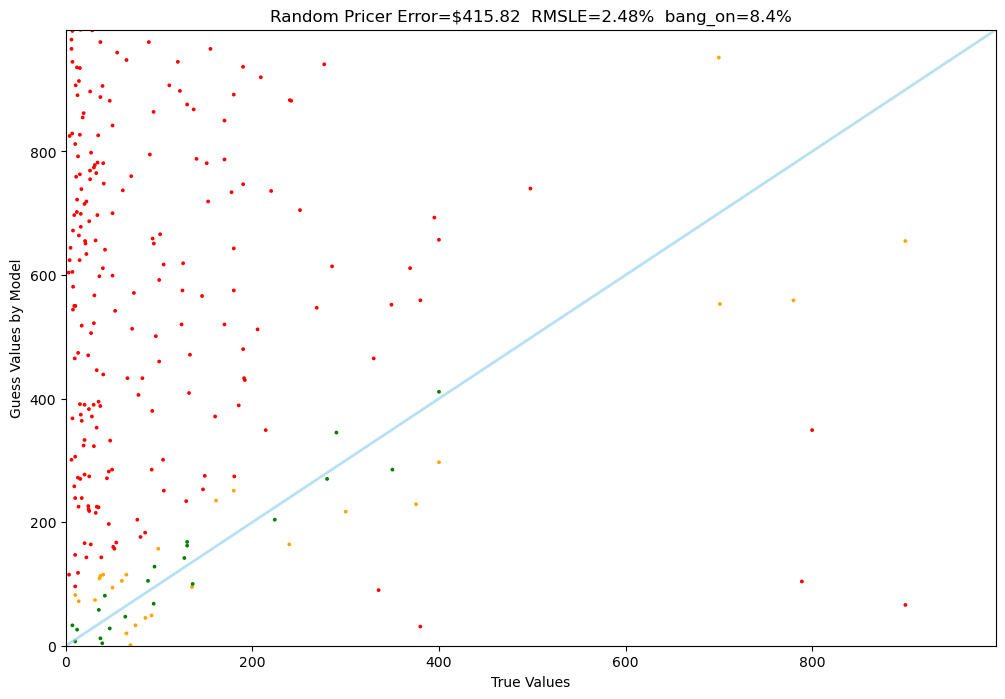

In [9]:
random.seed(42)

# 2. Define any predictor function
def random_pricer(item):
    return random.randrange(1, 1000)

# 3. Test any function
Tester.test(random_pricer)



1: Guess: $115.22 Truth: $899.95 Error: $784.73 SLE: 4.19 Item: ZLINE 30 in. Wooden Wall Mount Range Hoo...
2: Guess: $115.22 Truth: $3.40 Error: $111.82 SLE: 10.72 Item: Rise of Nations Rise of Legends
3: Guess: $115.22 Truth: $11.99 Error: $103.23 SLE: 4.80 Item: Anti Vibration Pads for Washing Machine ...
4: Guess: $115.22 Truth: $69.99 Error: $45.23 SLE: 0.24 Item: Vangoa Snare Drum Kit, Marching Snare Dr...
5: Guess: $115.22 Truth: $45.99 Error: $69.23 SLE: 0.82 Item: BaoFeng Walkie Talkies for Adults Long R...
6: Guess: $115.22 Truth: $104.99 Error: $10.23 SLE: 0.01 Item: Auto Ventshade [AVS] Aeroskin Hood Prote...
7: Guess: $115.22 Truth: $375.40 Error: $260.18 SLE: 1.38 Item: LEGO Star Wars Darth Vader's TIE Fighter...
8: Guess: $115.22 Truth: $21.96 Error: $93.26 SLE: 2.63 Item: PDP Rock Candy Gesture Controller for Wi...
9: Guess: $115.22 Truth: $25.95 Error: $89.27 SLE: 2.14 Item: Decalrus - Protective Decal for Acer Pre...
10: Guess: $115.22 Truth: $59.95 Error: $55.27 SLE:

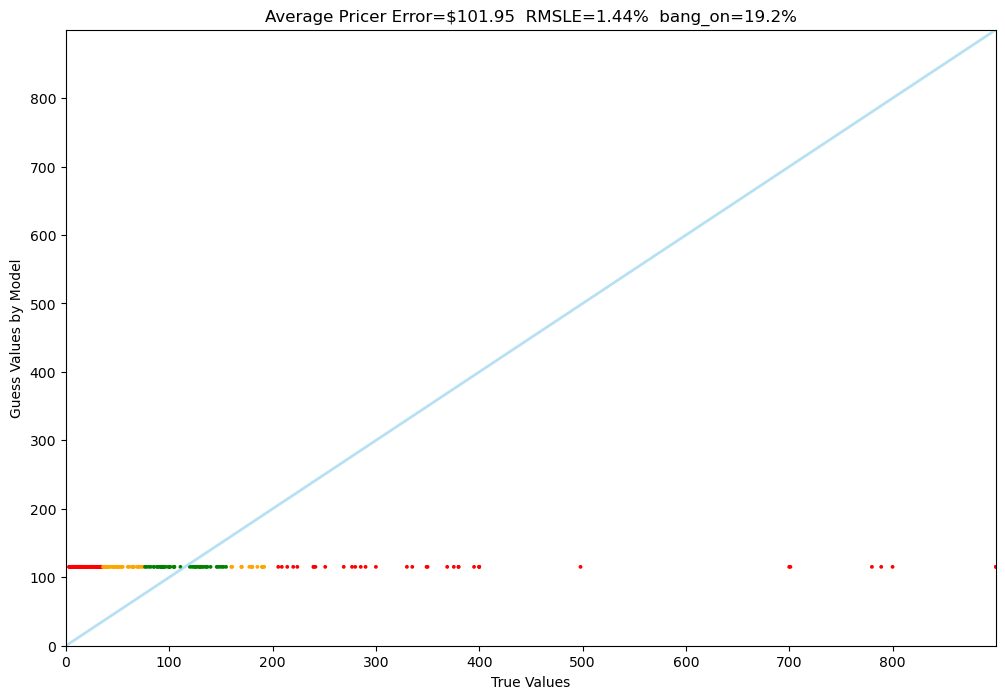

In [10]:
#guessing average 
average = train['price'].mean()

def average_pricer(item):
    return average
Tester.test(average_pricer)

In [11]:
train.keys()

Index(['title', 'price', 'category', 'test_prompt', 'prompt'], dtype='object')

In [12]:
'''
Training is missing the raw details so , 
I processed the data again this time including the raw details 
stored in data Raw
'''

'\nTraining is missing the raw details so , \nI processed the data again this time including the raw details \nstored in data Raw\n'

In [13]:
train_details_path = '/Users/vishesh/projects/Pricer/data/raw/train_details.pkl'
test_details_path = '/Users/vishesh/projects/Pricer/data/raw/test_details.pkl'
with open(train_details_path,'rb') as f:
    train_details = pickle.load(f)
with open(test_details_path , 'rb') as f :
    test_details = pickle.load(f)

In [14]:
test_details[234].details

'{"Brand": "Bostingner", "Color": "Matte Black", "Material": "Stainless Steel, Brass, Metal", "Finish Type": "\\u200eBrushed", "Number of Handles": "1", "Handle Material": "Brass", "Mounting Type": "Ceiling Mount", "Included Components": "1 \\u00d7 Shower Holder (Brass), 1 \\u00d7 User Manual, 1 \\u00d7 Pressure Balance Valve (Brass), 1 \\u00d7 60-inch Shower Hose (304 stainless steel), 1 \\u00d7 Shower Arm (Brass), 1 \\u00d7 Handheld Shower Head (Brass), 1 \\u00d7 10-inch Square Rain Shower Head (304 stainless steel)", "Flow Rate Description": "2.5 Gallons Per Minute", "Manufacturer": "Bostingner", "Part Number": "10 INCH SHOWER SYSTEM", "Item Weight": "11.92 pounds", "Product Dimensions": "17.32 x 13.46 x 4.72 inches", "Country of Origin": "China", "Item model number": "BST2202DH-C", "Size": "10 INCH SHOWER SYSTEM", "Style": "Ceiling Mount", "Finish": "Brushed", "Pattern": "10 Inch Matte Black Shower System Ceiling Mounted", "Shape": "Square", "Installation Method": "Ceiling-Mounted"

### Feature Engineering

In [15]:
#converting string to dictionary for extracting data/features easily using json 
#in a new features field populated with json from details dict
import json
for detail in train_details:
    detail.features = json.loads(detail.details)
for detail in test_details:
    detail.features = json.loads(detail.details)

train_details[0].features

{'Brand': 'Delphi',
 'Fit Type': 'Vehicle Specific Fit',
 'Item Dimensions LxWxH': '19.7 x 7.7 x 5.1 inches',
 'Item Weight': '2.2 Pounds',
 'Auto Part Position': 'Unknown',
 'Operation Mode': 'Mechanical',
 'Manufacturer': 'Delphi',
 'Model': 'FUEL PUMP',
 'Product Dimensions': '19.7 x 7.7 x 5.1 inches',
 'Country of Origin': 'USA',
 'Item model number': 'FG0166',
 'Is Discontinued By Manufacturer': 'No',
 'Exterior': 'Painted',
 'Manufacturer Part Number': 'FG0166',
 'OEM Part Number': '25326856, 89060639, A30416, E4061R, MU242',
 'Best Sellers Rank': {'Automotive': 913571,
  'Automotive Replacement Electric Fuel Pumps': 6568},
 'Domestic Shipping': 'Item can be shipped within U.S.',
 'International Shipping': 'This item is not eligible for international shipping.  Learn More',
 'Date First Available': 'August 9, 2006'}

In [16]:
#getting the most common features 
from collections import Counter
feature_count = Counter()
for item in train_details:
    for f in item.features.keys():
        feature_count[f]+=1
feature_count.most_common(20)

[('Date First Available', 360062),
 ('Item Weight', 350444),
 ('Manufacturer', 349357),
 ('Brand', 340323),
 ('Best Sellers Rank', 330473),
 ('Item model number', 277573),
 ('Product Dimensions', 262400),
 ('Color', 183794),
 ('Is Discontinued By Manufacturer', 169828),
 ('Manufacturer Part Number', 145092),
 ('Material', 137447),
 ('Country of Origin', 121451),
 ('Style', 77639),
 ('Special Feature', 74709),
 ('Part Number', 74529),
 ('Batteries Required?', 73595),
 ('Package Dimensions', 72900),
 ('Item Dimensions LxWxH', 71385),
 ('Included Components', 67509),
 ('Model', 65144)]

In [17]:
#I believe Item Weight Manufacturer brand and Sellers Rank can be useful 
#diving into each categories for better knowledge 

In [18]:
brands = Counter() 
for item in train_details:
    brand = item.features.get('Brand') 
    if brand :
        brands[brand] +=1
brands.most_common(40)

[('HP', 5500),
 ('Power Stop', 3594),
 ('Dell', 3254),
 ('Detroit Axle', 2734),
 ('Lenovo', 2441),
 ('Dorman', 2116),
 ('SAMSUNG', 1772),
 ('BUYAUTOPARTS!', 1715),
 ('ACDelco', 1609),
 ('Evan Fischer', 1415),
 ('ASUS', 1387),
 ('Sony', 1282),
 ('Canon', 1201),
 ('Callahan BRAKE PARTS', 1154),
 ('Kohler', 1152),
 ('CURT', 1120),
 ('R1 Concepts', 1054),
 ('Rareelectrical', 966),
 ('Coverking', 941),
 ('Garage-Pro', 888),
 ('Kingston Brass', 852),
 ('Spectra Premium', 834),
 ('Moen', 829),
 ('Auto Dynasty', 824),
 ('WeatherTech', 822),
 ('DELTA FAUCET', 811),
 ('Generic', 793),
 ('Apple', 783),
 ('Cardone', 765),
 ('APS', 763),
 ('K&N', 758),
 ('GM', 743),
 ('Walker', 732),
 ('EBC Brakes', 717),
 ('AKKON', 646),
 ('SPEC-D TUNING', 626),
 ('TYC', 626),
 ('Covercraft', 618),
 ('Intel', 610),
 ('A-Premium', 607)]

In [19]:
#looking the brands it seems like top brands are related to electronics 
TOP_ELECTRONICS_BRANDS = ['hp','dell','lenovo','samsung','asus','sony','canon','apple','intel']

PREMIUM_ELECTRONICS_BRANDS = ['apple', 'sony', 'canon', 'samsung']

TOP_AUTO_PARTS_BRANDS = ['power stop', 'detroit axle', 'dorman', 'buyautoparts!', 'acdelco', 
                         'evan fischer', 'callahan brake parts', 'r1 concepts', 'rareelectrical',
                         'garage-pro', 'spectra premium', 'auto dynasty', 'cardone', 'aps', 
                         'gm', 'walker', 'ebc brakes', 'akkon', 'spec-d tuning', 'tyc', 'a-premium']

TOP_AUTO_ACCESSORIES_BRANDS = ['curt', 'coverking', 'weathertech', 'covercraft', 'k&n']

def is_top_electronics_brand(item):
    brand = item.features.get("Brand")
    return brand and brand.lower() in TOP_ELECTRONICS_BRANDS

def is_premium_electronics_brand(item):
    brand = item.features.get("Brand")
    return brand and brand.lower() in PREMIUM_ELECTRONICS_BRANDS

def is_top_auto_parts_brand(item):
    brand = item.features.get("Brand")
    return brand and brand.lower() in TOP_AUTO_PARTS_BRANDS

def is_top_auto_accessories_brand(item):
    brand = item.features.get("Brand")
    return brand and brand.lower() in TOP_AUTO_ACCESSORIES_BRANDS


In [20]:
#focusing on weight of item now 


#I see the unit of weight is not constant ( I want to stick to the grams convention)
def get_weight(item):
    weight_str = item.features.get('Item Weight')
    if weight_str:
        parts = weight_str.split(' ')
        amount = float(parts[0])
        unit = parts[1].lower()
        
        if unit == "pounds":
            return amount * 453.592  #pounds to g
        elif unit == "ounces":
            return amount * 28.3495  #ounces to g
        elif unit == "grams":
            return amount  # in g
        elif unit == "milligrams":
            return amount / 1000  #mg to g
        elif unit == "kilograms":
            return amount * 1000  #kg to g
        elif unit == "hundredths" and parts[2].lower() == "pounds":
            return (amount / 100) * 453.592  #hundredths of pounds to g
        else:
            print(weight_str)
    return None

In [21]:
#storing weights
weights = [get_weight(item) for item in train_details]
weights = [w for w in weights if w] #removing duplicates or empty 

In [22]:
average_weight = sum(weights)/len(weights)
print(f"{average_weight:,.2f}")

#filling the empty weights with average weight 
def get_weight_with_default(item):
    weight = get_weight(item)
    return weight or average_weight

6,155.49


In [23]:
#focusing on rank 
# single product has multiple ranks(in different product categories)
# so taking average of all of them 
def get_rank(item):
    rank_dict = item.features.get("Best Sellers Rank")
    if rank_dict:
        ranks = rank_dict.values()
        return sum(ranks)/len(ranks)
    return None 

ranks=[get_rank(item) for item in train_details]
ranks = [r for r in ranks if r]
average_rank = sum(ranks)/len(ranks)
print(f"{average_rank:,.2f}")

380,638.26


In [24]:
#filling empty with average rank
def get_rank_with_default(item):
    rank = get_rank(item)
    return rank or average_rank

In [25]:
def get_text_length(item):
    return len(item.test_prompt())

In [26]:
#getting a features dictionary 
def get_features(item):
    return {
        'weight':get_weight_with_default(item) ,
        'rank':get_rank_with_default(item) ,
        'is_top_auto_parts_brand' : 1 if is_top_auto_parts_brand(item) else 0 ,
        'is_premium_electronics_brand': 1 if is_premium_electronics_brand(item) else 0 ,
        'is_top_electronics_brand': 1 if is_top_electronics_brand(item) else 0 ,
        'is_top_auto_accessories_brand': 1 if is_top_auto_accessories_brand(item) else 0 ,
        'text_length': get_text_length(item) ,
    }

In [27]:
get_features(train_details[35])

{'weight': 14605.662400000001,
 'rank': 964.6666666666666,
 'is_top_auto_parts_brand': 0,
 'is_premium_electronics_brand': 1,
 'is_top_electronics_brand': 1,
 'is_top_auto_accessories_brand': 0,
 'text_length': 738}

In [28]:
#converting to df 
def list_to_df(items):
    features = [get_features(item) for item in items]
    df = pd.DataFrame(features)
    df['price'] = [item.price for item in items]
    return df

train_details_df = list_to_df(train_details)
test_details_df = list_to_df(test_details)


### Baseline Models

#### Need to have another tester class which tests on the list of the data I have provided 

In [32]:
class Tester_baseline:

    def __init__(self, predictor, title=None, data=test_details, size=250):
        self.predictor = predictor
        self.data = data
        self.title = title or predictor.__name__.replace("_", " ").title()
        self.size = size
        self.guesses = []
        self.truths = []
        self.errors = []
        self.sles = []
        self.colors = []

    def color_for(self, error, truth):
        if error<40 or error/truth < 0.2:
            return "green"
        elif error<80 or error/truth < 0.4:
            return "orange"
        else:
            return "red"
    
    def run_datapoint(self, i):
        datapoint = self.data[i]
        guess = self.predictor(datapoint)
        truth = datapoint.price
        error = abs(guess - truth)
        log_error = math.log(truth+1) - math.log(guess+1)
        sle = log_error ** 2
        color = self.color_for(error, truth)
        title = datapoint.title if len(datapoint.title) <= 40 else datapoint.title[:40]+"..."
        self.guesses.append(guess)
        self.truths.append(truth)
        self.errors.append(error)
        self.sles.append(sle)
        self.colors.append(color)
        print(f"{COLOR_MAP[color]}{i+1}: Guess: ${guess:,.2f} Truth: ${truth:,.2f} Error: ${error:,.2f} SLE: {sle:,.2f} Item: {title}{RESET}")

    def chart(self, title):
        max_error = max(self.errors)
        plt.figure(figsize=(12, 8))
        max_val = max(max(self.truths), max(self.guesses))
        plt.plot([0, max_val], [0, max_val], color='deepskyblue', lw=2, alpha=0.6)
        plt.scatter(self.truths, self.guesses, s=3, c=self.colors)
        plt.xlabel('Ground Truth')
        plt.ylabel('Model Estimate')
        plt.xlim(0, max_val)
        plt.ylim(0, max_val)
        plt.title(title)
        plt.show()

    def report(self):
        average_error = sum(self.errors) / self.size
        rmsle = math.sqrt(sum(self.sles) / self.size)
        hits = sum(1 for color in self.colors if color=="green")
        title = f"{self.title} Error=${average_error:,.2f} RMSLE={rmsle:,.2f} Hits={hits/self.size*100:.1f}%"
        self.chart(title)

    def run(self):
        self.error = 0
        for i in range(self.size):
            self.run_datapoint(i)
        self.report()

    @classmethod
    def test(cls, function):
        cls(function).run()

#### Linear Regression

In [29]:
np.random.seed(42)

train_details_df.keys()

Index(['weight', 'rank', 'is_top_auto_parts_brand',
       'is_premium_electronics_brand', 'is_top_electronics_brand',
       'is_top_auto_accessories_brand', 'text_length', 'price'],
      dtype='object')

In [30]:
feature_columns = ['weight', 'rank', 'is_top_auto_parts_brand',
       'is_premium_electronics_brand', 'is_top_electronics_brand',
       'is_top_auto_accessories_brand', 'text_length']

X_train = train_details_df[feature_columns]
Y_train = train_details_df['price']
x_test =test_details_df[feature_columns]
y_test =test_details_df['price']

model= LinearRegression()
model.fit(X_train , Y_train)

for feature , coef in zip(feature_columns , model.coef_):
    print(f"{feature}:{coef}")
print(f"Intercept :{model.intercept_}")

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test , y_pred)
r2=r2_score(y_test , y_pred)

print(f"RMSE :{(mse)**0.5}")
print(f"R-squared Score :{r2}")

weight:0.0005819372506698307
rank:5.1911328817418245e-05
is_top_auto_parts_brand:-0.7957915360511377
is_premium_electronics_brand:-62.370519689392786
is_top_electronics_brand:215.64467316897324
is_top_auto_accessories_brand:16.102562364956402
text_length:0.011850189448517182
Intercept :178.83197297550592
RMSE :176.7695015203689
R-squared Score :0.08653086259074871


In [31]:
def linear_regression_pricer(item):
    features = get_features(item)
    features_df = pd.DataFrame([features])
    return model.predict(features_df)[0]

1: Guess: $228.01 Truth: $374.41 Error: $146.40 SLE: 0.24 Item: OEM AC Compressor w/A/C Repair Kit For F...
2: Guess: $213.93 Truth: $225.11 Error: $11.18 SLE: 0.00 Item: Motorcraft YB3125 Fan Clutch
3: Guess: $190.13 Truth: $61.68 Error: $128.45 SLE: 1.24 Item: Dorman 603-159 Front Washer Fluid Reserv...
4: Guess: $407.41 Truth: $599.99 Error: $192.58 SLE: 0.15 Item: HP Premium 17.3-inch HD Plus Touchscreen...
5: Guess: $211.19 Truth: $16.99 Error: $194.20 SLE: 6.09 Item: 5-Position Super Switch Pickup Selector ...
6: Guess: $211.31 Truth: $31.99 Error: $179.32 SLE: 3.47 Item: Horror Bookmarks, Resin Horror Bookmarks...
7: Guess: $191.15 Truth: $101.79 Error: $89.36 SLE: 0.39 Item: SK6241 - Stinger 4 Gauge 6000 Series Pow...
8: Guess: $189.59 Truth: $289.00 Error: $99.41 SLE: 0.18 Item: Godox ML60Bi LED Light Kit, Handheld LED...
9: Guess: $220.54 Truth: $635.86 Error: $415.32 SLE: 1.12 Item: Randall RG75DG3PLUS G3 Plus 100-Watt Com...
10: Guess: $199.52 Truth: $65.99 Error: $133.53 S

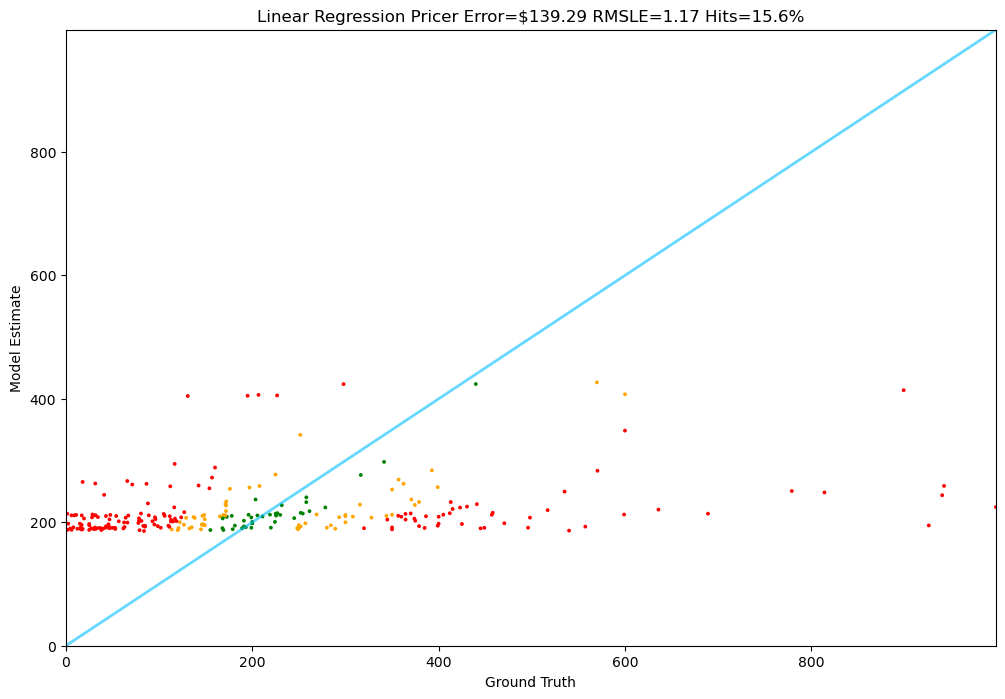

In [33]:
Tester_baseline.test(linear_regression_pricer)

#### BoW

In [50]:
# 1. Data Preparation
documents = train['test_prompt'].to_list()
# test prompt so the model doesn't see the price
np.random.seed(42)
prices = train['price'].astype(float).to_numpy()
# using np array maybe much better for setting random seeds 
# also LR converts it into array so better for efficiency

# 2. Processing and Training
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)
regressor = LinearRegression()
regressor.fit(X, prices)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
def bow_lr_pricer(item):
    x = vectorizer.transform([item.test_prompt])
    return max(regressor.predict(x)[0],0)  #ensuring no negetive price is returned , also regressor.predict() return a numpy array

1: Guess: $307.55 Truth: $899.95 Error: $592.40 SLE: 1.15 Item: ZLINE 30 in. Wooden Wall Mount Range Hoo...
2: Guess: $44.26 Truth: $3.40 Error: $40.86 SLE: 5.43 Item: Rise of Nations Rise of Legends
3: Guess: $0.00 Truth: $11.99 Error: $11.99 SLE: 6.58 Item: Anti Vibration Pads for Washing Machine ...
4: Guess: $184.90 Truth: $69.99 Error: $114.91 SLE: 0.93 Item: Vangoa Snare Drum Kit, Marching Snare Dr...
5: Guess: $22.83 Truth: $45.99 Error: $23.16 SLE: 0.46 Item: BaoFeng Walkie Talkies for Adults Long R...
6: Guess: $137.42 Truth: $104.99 Error: $32.43 SLE: 0.07 Item: Auto Ventshade [AVS] Aeroskin Hood Prote...
7: Guess: $181.33 Truth: $375.40 Error: $194.07 SLE: 0.53 Item: LEGO Star Wars Darth Vader's TIE Fighter...
8: Guess: $38.18 Truth: $21.96 Error: $16.22 SLE: 0.29 Item: PDP Rock Candy Gesture Controller for Wi...
9: Guess: $75.80 Truth: $25.95 Error: $49.85 SLE: 1.10 Item: Decalrus - Protective Decal for Acer Pre...
10: Guess: $119.68 Truth: $59.95 Error: $59.73 SLE: 0.47 It

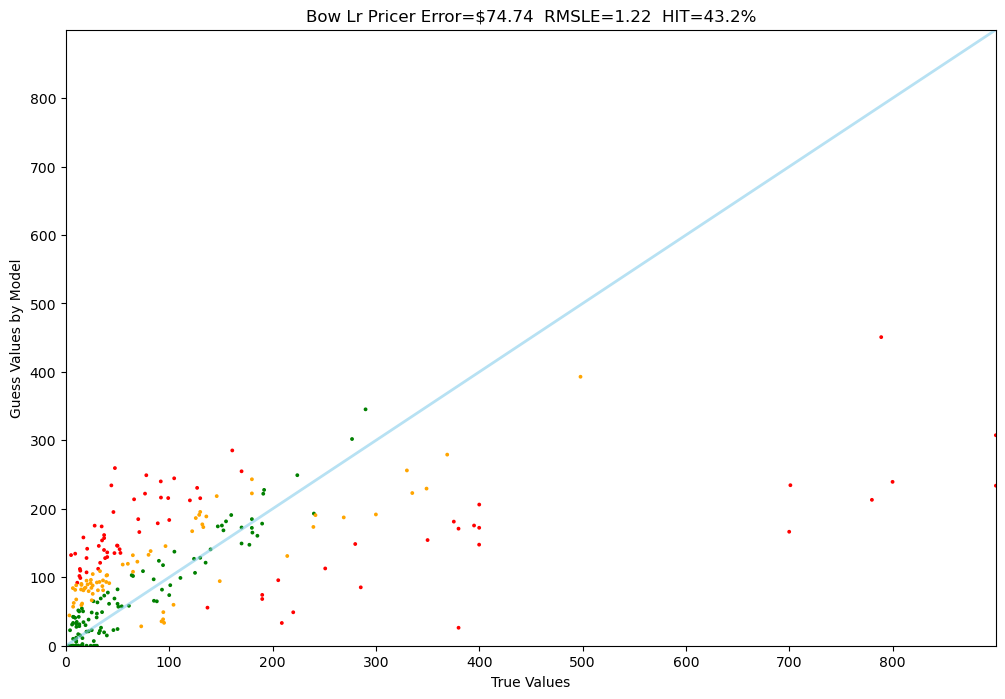

In [52]:
Tester.test(bow_lr_pricer)

#### Word2Vec